In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [ ]:
# checking which device is run gpu or cpu
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9163561705085780820
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16818702001363987082
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# data import and split

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# display some data of data sets

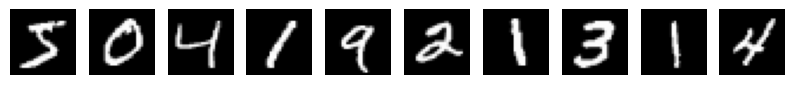

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,20))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i], cmap=('gray'))
  plt.axis('off')
plt.show()
plt.close()

# display the shapes of data_variables test and train

In [ ]:
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


# now reshapping the data for consumption of tensorflow as

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# minmax scalling

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one hot encoding

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# here print shape of data again
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('x_test :',x_test.shape)
print('y_test :',y_test.shape)

x_train : (60000, 28, 28, 1)
y_train : (60000, 10)
x_test : (10000, 28, 28, 1)
y_test : (10000, 10)


# build CNN model

In [ ]:
import keras.models
from keras.models import Sequential
from keras.layers import Dense, Flatten  # Import directly from keras.layers
from keras.layers import Conv2D, MaxPooling2D

# devrlop CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,866 (210.41 KB)

 Trainable params: 53,866 (210.41 KB)

 Non-trainable params: 0 (0.00 B)

# Train the CNN mode

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3117 - loss: 2.0279 - val_accuracy: 0.8717 - val_loss: 0.4399
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8785 - loss: 0.4052 - val_accuracy: 0.9119 - val_loss: 0.2891
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9161 - loss: 0.2751 - val_accuracy: 0.9368 - val_loss: 0.2131
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9341 - loss: 0.2148 - val_accuracy: 0.9462 - val_loss: 0.1777
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9436 - loss: 0.1848 - val_accuracy: 0.9558 - val_loss: 0.1487
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9539 - loss: 0.1535 - val_accuracy: 0.9591 - val_loss: 0.1385
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9593 - loss: 0.1360 - val_accuracy: 0.9655 - val_loss: 0.1103
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9628 - loss: 0.1240 - val_accuracy: 0.

# testing the model

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
accuracy_score(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.967

# now test model with some data then compare each images with predict ouput

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


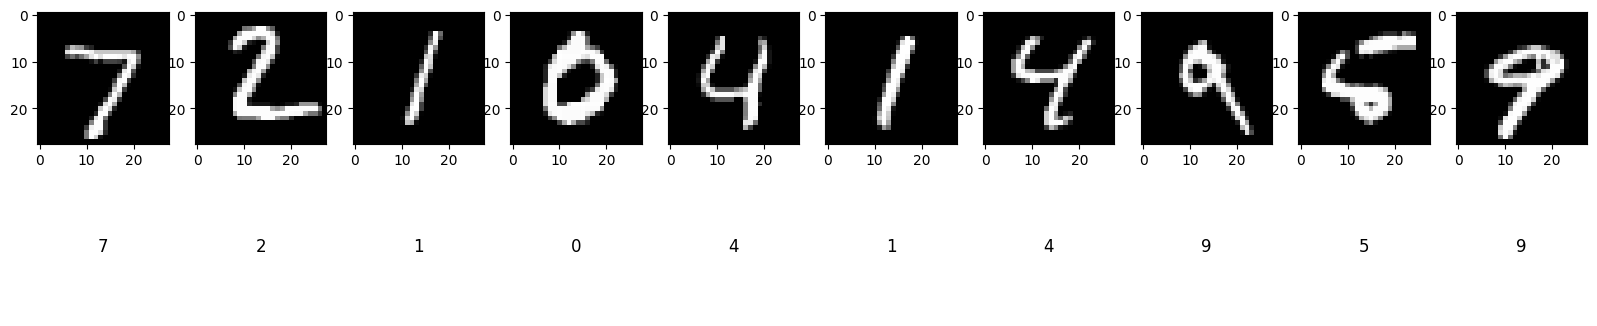

In [ ]:
x_valid = x_test[0:10]
actual_label = y_test[0:10]
predicted_label = model.predict(x_valid)
predicted_label = np.where(predicted_label > 0.5, 1, 0)
predicted_label = np.argmax(predicted_label, axis=1)

# now here create graph for show images and their predict output as:
plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_valid[i].reshape(28, 28), cmap='gray')

    # predicted digits
    plt.subplot(2, 10, i +1+10)
    plt.text(0.5,0.5, str(predicted_label[i]), fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.show()
plt.close()